In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [118]:
# load the scores, and original full data
full_data = np.load("test_images_dense/full_dense_light_curve_points_removed_spikes.npy")

DIR_TITLE = "test_images_dense/"
tsne_scores = pd.read_csv(DIR_TITLE + "tsne_outlier_scores_dense.csv")
umap_scores = pd.read_csv(DIR_TITLE + "umap_outlier_scores_dense.csv")

### TSNE - dense image picking

In [95]:
# dense light curve analysis
tsne_scores

,Unnamed: 0,tsne_outlier_score,light_curve_index
0,0,-0.014673,0
1,1,-0.874806,1
2,2,0.535171,2
3,3,0.181068,3
4,4,0.383667,4
...,...,...,...
2495,2495,-0.062383,2495
2496,2496,0.936749,2496
2497,2497,0.367434,2497
2498,2498,-0.601156,2498


In [96]:
tsne_scores.describe()

,Unnamed: 0,tsne_outlier_score,light_curve_index
count,2500.00000,2.500000e+03,2500.00000
mean,1249.50000,2.862338e-08,1249.50000
std,721.83216,1.000200e+00,721.83216
min,0.00000,-1.153109e+00,0.00000
25%,624.75000,-6.303785e-01,624.75000
50%,1249.50000,-2.725627e-01,1249.50000
75%,1874.25000,2.950932e-01,1874.25000
max,2499.00000,9.024843e+00,2499.00000


(array([1.485e+03, 6.840e+02, 2.070e+02, 7.300e+01, 2.600e+01, 1.400e+01,
        5.000e+00, 5.000e+00, 0.000e+00, 1.000e+00]),
 array([-1.1531092 , -0.13531398,  0.88248124,  1.90027646,  2.91807168,
         3.9358669 ,  4.95366212,  5.97145734,  6.98925256,  8.00704778,
         9.024843  ]),
 <a list of 10 Patch objects>)

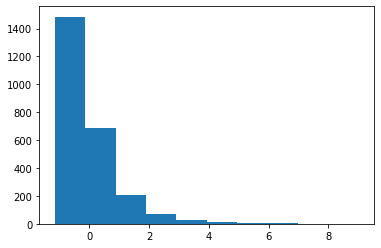

In [97]:
plt.hist(tsne_scores["tsne_outlier_score"])

In [98]:
bins = [-1, 0, 1, 2, 6]


In [99]:
lc_indices = []
scores = []

lc_indices.append(tsne_scores[tsne_scores["tsne_outlier_score"] < bins[0]].iloc[1]["light_curve_index"])
scores.append(float(tsne_scores[tsne_scores["light_curve_index"] == lc_indices[-1]]["tsne_outlier_score"]))

for i in range(len(bins) - 1):
    temp = tsne_scores[tsne_scores["tsne_outlier_score"] >= bins[i]]
    temp = temp[temp["tsne_outlier_score"] <= bins[i+1]]
    lc_index = temp.iloc[1]["light_curve_index"]
    lc_indices.append(lc_index)
    scores.append(float(tsne_scores[tsne_scores["light_curve_index"] == lc_index]["tsne_outlier_score"]))
lc_indices.append(tsne_scores[tsne_scores["tsne_outlier_score"] > bins[len(bins) - 1]].iloc[1]["light_curve_index"])
scores.append(float(tsne_scores[tsne_scores["light_curve_index"] == lc_indices[-1]]["tsne_outlier_score"]))

In [100]:
print(lc_indices)
print(scores)

[21.0, 1.0, 3.0, 44.0, 45.0, 386.0]
[-1.0614431999999998, -0.8748064, 0.18106808, 1.1207725, 2.5927877, 6.841838]


In [101]:
from matplotlib.colors import LogNorm
def create_dmdt_plot(lc_indices, dmdt_data, scores, save_title):
    f, axarr = plt.subplots(3, 2, figsize=(10,10))
    row = 0
    for i, lc_index in enumerate(lc_indices):
        col = i % 2
        if col == 0:
            row += 1
        
        print("ON LC " + str(lc_index))
        ar_x = row - 1
        ar_y = col
        score = "%.2f" % scores[i]
        title = "LC: " + str(int(lc_index)) + " , score: " + str(score)
        axarr[ar_x, ar_y].set_title(title)
        
        to_show = dmdt_data[int(lc_index)]
        
        axarr[ar_x, ar_y].imshow(to_show, norm = LogNorm(), origin="lower")
            

#     axarr[2,2].set_visible(True)
    
    plt.tight_layout()
    plt.savefig(save_title, dpi=100)
    plt.close()
        
        
# outliers = [1980, 1799, 1392, 374, 2319, 1970, 386, 947, 1840]



create_dmdt_plot(lc_indices, full_data, scores, "new_final_images/dmdt_images/tsne_dense.ps")

ON LC 21.0
ON LC 1.0
ON LC 3.0
ON LC 44.0
ON LC 45.0
ON LC 386.0


### UMAP - dense image picking


In [102]:
umap_scores.describe()

,Unnamed: 0,umap_outlier_score,light_curve_index
count,2500.00000,2.500000e+03,2500.00000
mean,1249.50000,-8.434783e-08,1249.50000
std,721.83216,1.000200e+00,721.83216
min,0.00000,-1.521403e+00,0.00000
25%,624.75000,-7.133008e-01,624.75000
50%,1249.50000,-2.196841e-01,1249.50000
75%,1874.25000,4.775689e-01,1874.25000
max,2499.00000,7.203085e+00,2499.00000


(array([708., 974., 507., 192.,  78.,  23.,  11.,   4.,   2.,   1.]),
 array([-1.5214034 , -0.64895461,  0.22349418,  1.09594297,  1.96839176,
         2.84084055,  3.71328934,  4.58573813,  5.45818692,  6.33063571,
         7.2030845 ]),
 <a list of 10 Patch objects>)

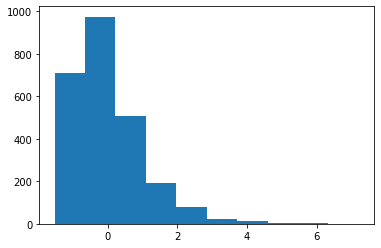

In [103]:
plt.hist(umap_scores["umap_outlier_score"])

In [104]:
bins = [-1, 0, 1, 2, 6]
lc_indices = []
scores = []

lc_indices.append(umap_scores[umap_scores["umap_outlier_score"] < bins[0]].iloc[1]["light_curve_index"])
scores.append(float(umap_scores[umap_scores["light_curve_index"] == lc_indices[-1]]["umap_outlier_score"]))

for i in range(len(bins) - 1):
    temp = umap_scores[umap_scores["umap_outlier_score"] >= bins[i]]
    temp = temp[temp["umap_outlier_score"] <= bins[i+1]]
    lc_index = temp.iloc[1]["light_curve_index"]
    lc_indices.append(lc_index)
    scores.append(float(umap_scores[umap_scores["light_curve_index"] == lc_index]["umap_outlier_score"]))
lc_indices.append(umap_scores[umap_scores["umap_outlier_score"] > bins[len(bins) - 1]].iloc[1]["light_curve_index"])
scores.append(float(umap_scores[umap_scores["light_curve_index"] == lc_indices[-1]]["umap_outlier_score"]))



In [105]:
print(lc_indices)
print(scores)

[24.0, 1.0, 6.0, 15.0, 5.0, 1980.0]
[-1.0544671, -0.061502325999999996, 0.8402139999999999, 1.5421798, 2.7002080000000004, 6.0948553]


In [106]:
create_dmdt_plot(lc_indices, full_data, scores, "new_final_images/dmdt_images/umap_dense.ps")

ON LC 24.0
ON LC 1.0
ON LC 6.0
ON LC 15.0
ON LC 5.0
ON LC 1980.0


In [120]:
## tabbys star
TABBY_STAR_INDEX = 1156
tabby_tsne_score = tsne_scores[tsne_scores["light_curve_index"] == TABBY_STAR_INDEX]["tsne_outlier_score"]
plt.imshow(full_data[TABBY_STAR_INDEX], norm=LogNorm(), origin="Lower")

title = "Tabby's Star (Dense)"
plt.title(title)
plt.tight_layout()
plt.savefig("new_final_images/dmdt_images/tabby_dense.ps", dpi=100)
plt.close()

### TSNE - sparse image picking

In [121]:
# load the scores, and original full data
full_data = np.load("sparse_light_curve_dmdt_final/full_sparse_light_curve_points_removed_spikes.npy")

DIR_TITLE = "june_14_images/"
tsne_scores = pd.read_csv(DIR_TITLE + "tsne_outlier_scores.csv")
umap_scores = pd.read_csv(DIR_TITLE + "umap_outlier_scores.csv")

In [108]:
tsne_scores.describe()

,Unnamed: 0,tsne_outlier_score,light_curve_index
count,2500.00000,2.500000e+03,2500.00000
mean,1249.50000,1.321212e-07,1249.50000
std,721.83216,1.000200e+00,721.83216
min,0.00000,-1.805012e+00,0.00000
25%,624.75000,-6.782405e-01,624.75000
50%,1249.50000,-9.048525e-02,1249.50000
75%,1874.25000,5.400390e-01,1874.25000
max,2499.00000,7.021760e+00,2499.00000


(array([442., 873., 752., 310.,  84.,  27.,   7.,   2.,   0.,   3.]),
 array([-1.8050123 , -0.92233502, -0.03965774,  0.84301954,  1.72569682,
         2.6083741 ,  3.49105138,  4.37372866,  5.25640594,  6.13908322,
         7.0217605 ]),
 <a list of 10 Patch objects>)

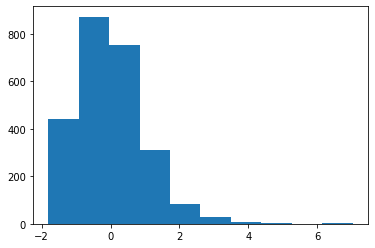

In [109]:
plt.hist(tsne_scores["tsne_outlier_score"])

In [110]:
bins = [-1, 0, 1, 2, 6]

lc_indices = []
scores = []

lc_indices.append(tsne_scores[tsne_scores["tsne_outlier_score"] < bins[0]].iloc[1]["light_curve_index"])
scores.append(float(tsne_scores[tsne_scores["light_curve_index"] == lc_indices[-1]]["tsne_outlier_score"]))

for i in range(len(bins) - 1):
    temp = tsne_scores[tsne_scores["tsne_outlier_score"] >= bins[i]]
    temp = temp[temp["tsne_outlier_score"] <= bins[i+1]]
    lc_index = temp.iloc[1]["light_curve_index"]
    lc_indices.append(lc_index)
    scores.append(float(tsne_scores[tsne_scores["light_curve_index"] == lc_index]["tsne_outlier_score"]))
lc_indices.append(tsne_scores[tsne_scores["tsne_outlier_score"] > bins[len(bins) - 1]].iloc[1]["light_curve_index"])
scores.append(float(tsne_scores[tsne_scores["light_curve_index"] == lc_indices[-1]]["tsne_outlier_score"]))

In [111]:
print(lc_indices)
print(scores)

[5.0, 9.0, 7.0, 20.0, 3.0, 1317.0]
[-1.6493415, -0.49475765, 0.43354923, 1.7025631999999997, 3.327803, 6.757254]


In [112]:
create_dmdt_plot(lc_indices, full_data, scores, "new_final_images/dmdt_images/tsne_sparse.ps")

ON LC 5.0
ON LC 9.0
ON LC 7.0
ON LC 20.0
ON LC 3.0
ON LC 1317.0


In [113]:
umap_scores.describe()

,Unnamed: 0,umap_outlier_score,light_curve_index
count,2500.00000,2.500000e+03,2500.00000
mean,1249.50000,-6.775724e-08,1249.50000
std,721.83216,1.000200e+00,721.83216
min,0.00000,-1.462530e+00,0.00000
25%,624.75000,-7.560087e-01,624.75000
50%,1249.50000,-2.193230e-01,1249.50000
75%,1874.25000,5.422159e-01,1874.25000
max,2499.00000,5.427856e+00,2499.00000


(array([599., 776., 537., 310., 162.,  67.,  28.,  16.,   4.,   1.]),
 array([-1.4625301 , -0.77349149, -0.08445288,  0.60458573,  1.29362434,
         1.98266295,  2.67170156,  3.36074017,  4.04977878,  4.73881739,
         5.427856  ]),
 <a list of 10 Patch objects>)

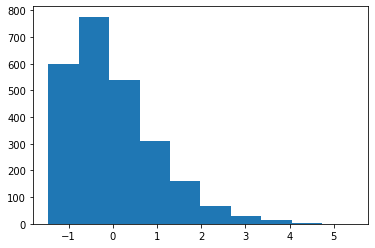

In [114]:
plt.hist(umap_scores["umap_outlier_score"])

In [115]:
bins = [-1, 0, 1, 2, 4]
lc_indices = []
scores = []

lc_indices.append(umap_scores[umap_scores["umap_outlier_score"] < bins[0]].iloc[1]["light_curve_index"])
scores.append(float(umap_scores[umap_scores["light_curve_index"] == lc_indices[-1]]["umap_outlier_score"]))

for i in range(len(bins) - 1):
    temp = umap_scores[umap_scores["umap_outlier_score"] >= bins[i]]
    temp = temp[temp["umap_outlier_score"] <= bins[i+1]]
    lc_index = temp.iloc[1]["light_curve_index"]
    lc_indices.append(lc_index)
    scores.append(float(umap_scores[umap_scores["light_curve_index"] == lc_index]["umap_outlier_score"]))
lc_indices.append(umap_scores[umap_scores["umap_outlier_score"] > bins[len(bins) - 1]].iloc[1]["light_curve_index"])
scores.append(float(umap_scores[umap_scores["light_curve_index"] == lc_indices[-1]]["umap_outlier_score"]))



In [116]:
print(lc_indices)
print(scores)

[17.0, 2.0, 3.0, 42.0, 20.0, 355.0]
[-1.3849847, -0.16631173, 0.33934692, 1.059859, 3.512322, 4.112435]


In [117]:
create_dmdt_plot(lc_indices, full_data, scores, "new_final_images/dmdt_images/umap_sparse.ps")

ON LC 17.0
ON LC 2.0
ON LC 3.0
ON LC 42.0
ON LC 20.0
ON LC 355.0


In [122]:
## tabbys star
TABBY_STAR_INDEX = 1156
tabby_tsne_score = tsne_scores[tsne_scores["light_curve_index"] == TABBY_STAR_INDEX]["tsne_outlier_score"]
plt.imshow(full_data[TABBY_STAR_INDEX], norm=LogNorm(), origin="Lower")

title = "Tabby's Star (Dense)"
plt.title(title)
plt.tight_layout()
plt.savefig("new_final_images/dmdt_images/tabby_sparse.ps", dpi=100)
plt.close()